# <span style='color:Yellow'>Imports & Settings</span>

## Import Libraries

In [42]:
# Fan favourites
import math
from IPython.display import Markdown, display
import random
import os
import time

In [50]:
# Required modules
import numpy as np
import pandas as pd

# mpl stuff
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Depreciated!! Use mpl.colormaps['']
from matplotlib.patches import Rectangle
import matplotlib.colors as mpl_colors

# seaborn stuff
import seaborn as sns

from scipy.stats import randint

# scikit stuff
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from sklearn.tree import plot_tree

## Import Custom Libraries

In [3]:
# nothing yet

## Self-defined Functions

In [4]:
# nothing yet

### <span style='color:Red'>Deprecated</span>

In [5]:
# def get_random_colour(min_colour_range = 0x007f7f, max_colour_range = 0xffffff):
#     colour = f'#{randint(min_colour_range, max_colour_range):06x}'
#     return colour

# def get_random_colours(length = 5, min_colour_range = 0x007f7f, max_colour_range = 0xffffff):
#     colours = [get_random_colour(min_colour_range, max_colour_range) for _ in range(length)]
#     return colours

# def show_colours(colours):
#     plt.figure(figsize = (len(colours), 1))
#     for colour in colours:
#         plt.bar(colour, [1] * len(colour),
#                 label = colour,
#                 color = colour)
#     plt.show()

## IDE (Jupyter) Settings

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# <span style='color:Yellow'>Pre-processing</span>

## Import Datafile

In [7]:
FILE = 'Group9 - missingdata.csv'

In [8]:
# import raw data
g9_df_raw = pd.read_csv(FILE, header = 0)

In [9]:
display(g9_df_raw.head(13))

,Condition,Cylinder heating zone 1,Cylinder heating zone 4,Maximum injection pressure,Mould temperature control unit 1,Cycle time,Cylinder heating zone 5,Injection time,Cylinder heating zone 2,Dosage time,Cylinder heating zone 3,Switch-over volume,Material cushion
0,Normal1,274.92,322.46,1445.52,87.70,29.120,325.19,0.234,309.30,3.086,314.73,1.38334,0.888447
1,Normal1,266.69,302.12,1521.99,90.97,29.678,301.82,0.224,292.32,3.058,322.99,1.35334,0.899772
2,Normal1,287.07,299.90,1504.16,93.18,NaN,301.29,0.244,NaN,3.098,297.00,1.37334,0.889388
3,Normal1,279.81,295.40,1536.42,92.58,29.876,323.39,0.244,303.88,2.938,297.65,1.40334,0.926952
4,Normal1,293.69,322.20,1505.81,NaN,29.126,307.31,0.224,281.91,3.168,324.13,1.48334,0.919580
5,Normal1,NaN,303.28,1499.84,86.40,29.316,303.78,NaN,303.91,3.090,NaN,1.41334,0.932977
6,Normal1,284.60,307.72,1446.05,93.99,27.508,309.78,0.224,281.31,2.918,309.82,1.35334,NaN
7,Normal1,278.29,321.87,1579.28,93.41,28.478,313.54,0.244,304.19,2.850,300.17,1.38334,0.935242
8,Normal1,278.14,324.31,NaN,86.60,29.758,319.46,0.244,308.84,2.896,304.51,1.44334,0.892977
9,Normal1,285.16,324.40,1549.57,92.05,30.238,329.77,0.234,284.19,2.976,319.64,1.44334,0.884110


## <span style='color:Red'>Find and remove outliers?</span>

In [10]:
# For now, remove outliers manually?
g9_df_o = g9_df_raw.drop(index = 85, inplace = False)

Winsorizing is a technique used to address outliers in data analysis. It replaces outlier values with values closer to the main body of the data distribution, without completely removing them. This can be useful in situations where outliers might be genuine data points but can have a significant impact on statistical calculations or visualizations.

Here's how winsorizing works:

Identify outliers: You can identify outliers using various methods like IQR (Interquartile Range) or z-scores. These methods establish thresholds for what constitutes an outlier based on the distribution of the data.
Define winsorizing limits: You define two thresholds, one for the lower bound and one for the upper bound. These thresholds are typically chosen based on the quartiles of the data distribution (e.g., values below a certain percentile or above another percentile).
Replace outliers: Any data point falling outside the winsorizing limits (i.e., below the lower threshold or above the upper threshold) is replaced with the value at the respective threshold.
Here's a simple illustration:

Imagine a dataset with values ranging from 1 to 100, but there's a single data point at 200 (far above the rest). Winsorizing might involve:

Setting the lower threshold at the value of the 75th percentile (e.g., 70).
Setting the upper threshold at the value of the 99th percentile (e.g., 95).
The outlier value of 200 would then be replaced with the upper threshold value of 95.
This keeps the outlier within a more reasonable range while still preserving the information that it might be a higher value than most other data points.

Winsorizing is a balancing act between keeping some information from outliers while reducing their undue influence on the analysis. It's important to consider the context of your data and analysis goals before applying winsorizing.

Here are some additional points to consider:

Winsorizing can be performed on both tails of the distribution (upper and lower) or just one tail, depending on the nature of the outliers.
The choice of thresholds for winsorizing can impact the results. Be mindful of how you define these thresholds based on your data and analysis.
I hope this explanation clarifies what winsorizing is and how it's used in data analysis!

## Define Unique Sets

In [11]:
# THESE ARE ON RAW DATA!! LET IT BE!!

# Categories
conditions = np.sort(g9_df_raw['Condition'].unique())

# Parameters
params = np.sort(g9_df_raw.columns[1:])
display(params)

array(['Cycle time', 'Cylinder heating zone 1', 'Cylinder heating zone 2',
       'Cylinder heating zone 3', 'Cylinder heating zone 4',
       'Cylinder heating zone 5', 'Dosage time', 'Injection time',
       'Material cushion', 'Maximum injection pressure',
       'Mould temperature control unit 1', 'Switch-over volume'],
      dtype=object)

## Manage NaN Values

### <span style='color:Orange'>Fill NaN values with MEAN per Condition.</span>

In [12]:
g9_df = g9_df_raw.copy()
g9_df = g9_df_o.copy() # Comment out this line if obvious outlier is to be included in the analysis.

In [13]:
# Fill all NaN values by mean of condition.
for param in params:
    g9_df[param] = g9_df[param].fillna(g9_df.groupby('Condition')[param].transform('mean'))

This approach assumes there aren't too many missing values within each 'Condition' group.

_If there are a significant number of missing values, using the mean might not be the most robust imputation strategy._

In [14]:
display(g9_df.head(13))

,Condition,Cylinder heating zone 1,Cylinder heating zone 4,Maximum injection pressure,Mould temperature control unit 1,Cycle time,Cylinder heating zone 5,Injection time,Cylinder heating zone 2,Dosage time,Cylinder heating zone 3,Switch-over volume,Material cushion
0,Normal1,274.920000,322.46,1445.520000,87.700000,29.120000,325.19,0.234000,309.300000,3.086,314.730000,1.38334,0.888447
1,Normal1,266.690000,302.12,1521.990000,90.970000,29.678000,301.82,0.224000,292.320000,3.058,322.990000,1.35334,0.899772
2,Normal1,287.070000,299.90,1504.160000,93.180000,28.883083,301.29,0.244000,293.361667,3.098,297.000000,1.37334,0.889388
3,Normal1,279.810000,295.40,1536.420000,92.580000,29.876000,323.39,0.244000,303.880000,2.938,297.650000,1.40334,0.926952
4,Normal1,293.690000,322.20,1505.810000,90.194583,29.126000,307.31,0.224000,281.910000,3.168,324.130000,1.48334,0.919580
5,Normal1,279.992917,303.28,1499.840000,86.400000,29.316000,303.78,0.234213,303.910000,3.090,310.488542,1.41334,0.932977
6,Normal1,284.600000,307.72,1446.050000,93.990000,27.508000,309.78,0.224000,281.310000,2.918,309.820000,1.35334,0.947207
7,Normal1,278.290000,321.87,1579.280000,93.410000,28.478000,313.54,0.244000,304.190000,2.850,300.170000,1.38334,0.935242
8,Normal1,278.140000,324.31,1544.233333,86.600000,29.758000,319.46,0.244000,308.840000,2.896,304.510000,1.44334,0.892977
9,Normal1,285.160000,324.40,1549.570000,92.050000,30.238000,329.77,0.234000,284.190000,2.976,319.640000,1.44334,0.884110


## Sort Data

In [15]:
g9_df.sort_index(axis = 1, inplace = True)
g9_df.sort_values(by = ['Condition', 'Material cushion'], inplace = True)

In [16]:
display(g9_df)

,Condition,Cycle time,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Dosage time,Injection time,Material cushion,Maximum injection pressure,Mould temperature control unit 1,Switch-over volume
96,Condition1,27.812000,276.460000,307.330000,317.940000,314.040000,338.290000,2.895500,0.234000,0.868255,1497.640000,92.660000,1.343340
109,Condition1,28.544000,293.060000,318.290000,305.880000,332.190000,321.790000,2.916000,0.234000,0.868255,1466.930000,88.000000,1.463340
88,Condition1,30.170000,278.120000,296.060000,334.370000,334.690000,325.250000,2.880000,0.234000,0.870520,1501.200000,91.750000,1.343340
107,Condition1,29.972000,283.190000,306.620000,310.540000,315.110000,340.780000,2.808000,0.234417,0.870520,1491.430000,89.235000,1.403340
91,Condition1,27.592000,283.730000,313.050000,316.720000,335.000000,314.410000,2.816000,0.224000,0.885990,1540.740000,90.150000,1.433340
87,Condition1,28.822000,276.330000,300.840000,317.359167,312.940000,326.150000,3.000000,0.244000,0.886183,1421.750000,88.200000,1.343340
90,Condition1,29.600000,288.778750,294.770000,309.230000,320.880000,326.670435,2.814000,0.244000,0.888255,1460.550000,87.030000,1.443340
94,Condition1,27.980000,303.260000,306.510000,333.280000,318.146250,336.360000,2.980000,0.244000,0.896183,1553.930000,87.870000,1.417507
110,Condition1,29.684000,287.810000,303.450000,304.770000,310.100000,319.240000,2.800000,0.234000,0.898255,1515.950000,87.610000,1.403340
86,Condition1,28.942000,300.850000,306.100000,335.450000,312.560000,336.250000,2.954000,0.234000,0.902977,1567.630000,91.750000,1.473340


# <span style='color:Yellow'>Summary & Stats</span>

In [17]:
g9_des = {}

for condition in conditions:
    g9_des[condition] = g9_df[g9_df['Condition'] == condition].describe(include = 'all')

For consideration to calculate IQR and Range.

In [18]:
# def calc_iqr_range(data):
#   '''
#   Calculates Interquartile Range (IQR) and Range for a pandas Series or DataFrame.

#   Args:
#       data: A pandas Series or DataFrame containing numeric data.

#   Returns:
#       A dictionary containing IQR and Range values.
#   '''
#   q1 = data.quantile(0.25)
#   q3 = data.quantile(0.75)
#   iqr = q3 - q1
#   data_range = data.max() - data.min()
#   return {'IQR': iqr, 'Range': data_range}

# for condition in conditions:
#   subset_df = g9_df[g9_df['Condition'] == condition]
#   stats = subset_df.describe(include='all')
#   # Calculate IQR and Range using the custom function
#   iqr_range = calc_iqr_range(subset_df)
#   # Update stats dictionary with IQR and Range
#   stats.update(iqr_range)
#   g9_des[condition] = stats

In [19]:
for condition in conditions:
    display(g9_des[condition])

,Condition,Cycle time,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Dosage time,Injection time,Material cushion,Maximum injection pressure,Mould temperature control unit 1,Switch-over volume
count,26,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.00000,26.000000,26.000000,26.000000,26.000000,26.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Condition1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,28.966667,288.778750,306.426250,317.359167,318.146250,326.670435,2.89550,0.234417,0.913038,1489.410000,89.235000,1.417507
std,NaN,0.794227,8.971751,7.940761,9.651431,9.650574,8.579631,0.07970,0.007735,0.032232,44.489642,2.146157,0.045247
min,NaN,27.552000,275.620000,292.410000,304.460000,304.980000,312.120000,2.76200,0.224000,0.868255,1421.750000,85.570000,1.343340
25%,NaN,28.588000,281.340000,300.892500,310.022500,310.642500,319.685000,2.81850,0.226500,0.890237,1458.645000,87.877500,1.385840
50%,NaN,28.954333,288.778750,306.426250,315.540000,314.575000,326.670435,2.89575,0.234000,0.913917,1489.410000,89.122500,1.417507
75%,NaN,29.592500,297.067500,312.810000,323.395000,325.847500,335.107500,2.95050,0.244000,0.924671,1513.452500,90.835000,1.450840


,Condition,Cycle time,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Dosage time,Injection time,Material cushion,Maximum injection pressure,Mould temperature control unit 1,Switch-over volume
count,35,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Condition7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,29.392545,281.552727,295.424242,310.545455,309.118788,315.477941,2.846303,1.940000e-01,0.904566,1735.325000,89.979091,1.417162
std,NaN,0.626166,8.159180,7.866702,9.006702,8.614709,8.472093,0.080386,2.816079e-17,0.027072,43.997971,2.580665,0.038798
min,NaN,27.486000,266.700000,282.950000,295.160000,295.030000,300.380000,2.692000,1.940000e-01,0.856930,1666.610000,85.550000,1.335420
25%,NaN,29.144000,273.430000,289.520000,301.860000,301.780000,308.920000,2.786000,1.940000e-01,0.884292,1696.765000,87.620000,1.395420
50%,NaN,29.454000,283.490000,294.890000,311.400000,308.570000,315.060000,2.860000,1.940000e-01,0.908447,1735.325000,90.440000,1.415420
75%,NaN,29.815000,287.875000,300.855000,318.355000,315.560000,322.415000,2.898000,1.940000e-01,0.930328,1768.810000,91.740000,1.450985


,Condition,Cycle time,Cylinder heating zone 1,Cylinder heating zone 2,Cylinder heating zone 3,Cylinder heating zone 4,Cylinder heating zone 5,Dosage time,Injection time,Material cushion,Maximum injection pressure,Mould temperature control unit 1,Switch-over volume
count,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Normal1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,28.883083,279.992917,293.361667,310.488542,309.567083,314.734468,2.955500,0.234213,0.947207,1544.233333,90.194583,1.407298
std,NaN,0.797309,7.107736,8.961685,8.627771,9.281702,9.171803,0.088607,0.008449,0.031388,46.701478,2.623928,0.044158
min,NaN,27.462000,266.330000,281.040000,295.040000,295.400000,299.710000,2.766000,0.224000,0.884110,1445.520000,85.910000,1.343340
25%,NaN,28.382500,274.975000,285.845000,304.487500,302.190000,307.815000,2.898500,0.224000,0.927411,1504.547500,87.677500,1.365840
50%,NaN,28.843542,279.700000,292.075000,310.609271,308.643542,314.734468,2.948000,0.234000,0.947207,1545.470000,90.430000,1.405319
75%,NaN,29.422000,284.532500,301.070000,317.172500,318.457500,322.852500,3.017500,0.244000,0.967802,1581.132500,92.595000,1.443340


# <span style='color:YELLOW'>Understand Data</span>

## In total, how many records, how many parameters? <span style='color:green'>DONE</span>

In [20]:
g9_shape = pd.DataFrame({'Count':g9_df_raw.shape}, index = ['Records', 'Parameters'])

In [21]:
display(g9_shape)

,Count
Records,112
Parameters,13


## Is this a classification or regression issue?

<span style='color:Orange'>Classification issue. Probably...</span>

## How many different classes in the data?

<span style='color:Orange'>I have no clue. I think 3.</span>

## How many records for each condition? <span style='color:green'>DONE</span>

In [22]:
g9_recs = g9_df_raw['Condition'].value_counts(dropna = False).to_frame()

In [23]:
display(g9_recs)

,count
Condition,
Normal1,50
Condition7,35
Condition1,27


## How many null values for each condition under each parameter? <span style='color:green'>DONE</span>

In [24]:
g9_nullcount = pd.DataFrame(columns = conditions)

for condition in conditions:
    g9_nullcount[condition] = g9_df_raw[g9_df_raw['Condition'] == condition].isnull().sum()

In [25]:
display(g9_nullcount)

,Condition1,Condition7,Normal1
Condition,0,0,0
Cylinder heating zone 1,2,2,2
Cylinder heating zone 4,2,2,2
Maximum injection pressure,2,3,2
Mould temperature control unit 1,2,2,2
Cycle time,2,2,2
Cylinder heating zone 5,3,1,3
Injection time,2,2,3
Cylinder heating zone 2,2,2,2
Dosage time,2,2,2


# <span style='color:Yellow'>Decision Tree</span>

## Define data.

In [26]:
condition_labels, unique_conditions = pd.factorize(g9_df['Condition'])

display(condition_labels)
display(unique_conditions)

X = g9_df[['Cycle time', 'Cylinder heating zone 1', 'Cylinder heating zone 2',
       'Cylinder heating zone 3', 'Cylinder heating zone 4',
       'Cylinder heating zone 5', 'Dosage time', 'Injection time',
       'Material cushion', 'Maximum injection pressure',
       'Mould temperature control unit 1', 'Switch-over volume']]
y = condition_labels

X = pd.DataFrame(X)
y = pd.DataFrame(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int64)

Index(['Condition1', 'Condition7', 'Normal1'], dtype='object')

## Default hyperparameters

In [27]:
default_tree = dt(random_state = 0)

In [28]:
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits = 4, shuffle = True, random_state = 0)

# accuracy list
accuracy_l = []

# result list
result_matrix = []

training data length: 83
verification data length: 28
Accuracy: 0.86
training data length: 83
verification data length: 28
Accuracy: 0.75
training data length: 83
verification data length: 28
Accuracy: 0.93
training data length: 84
verification data length: 27
Accuracy: 0.96


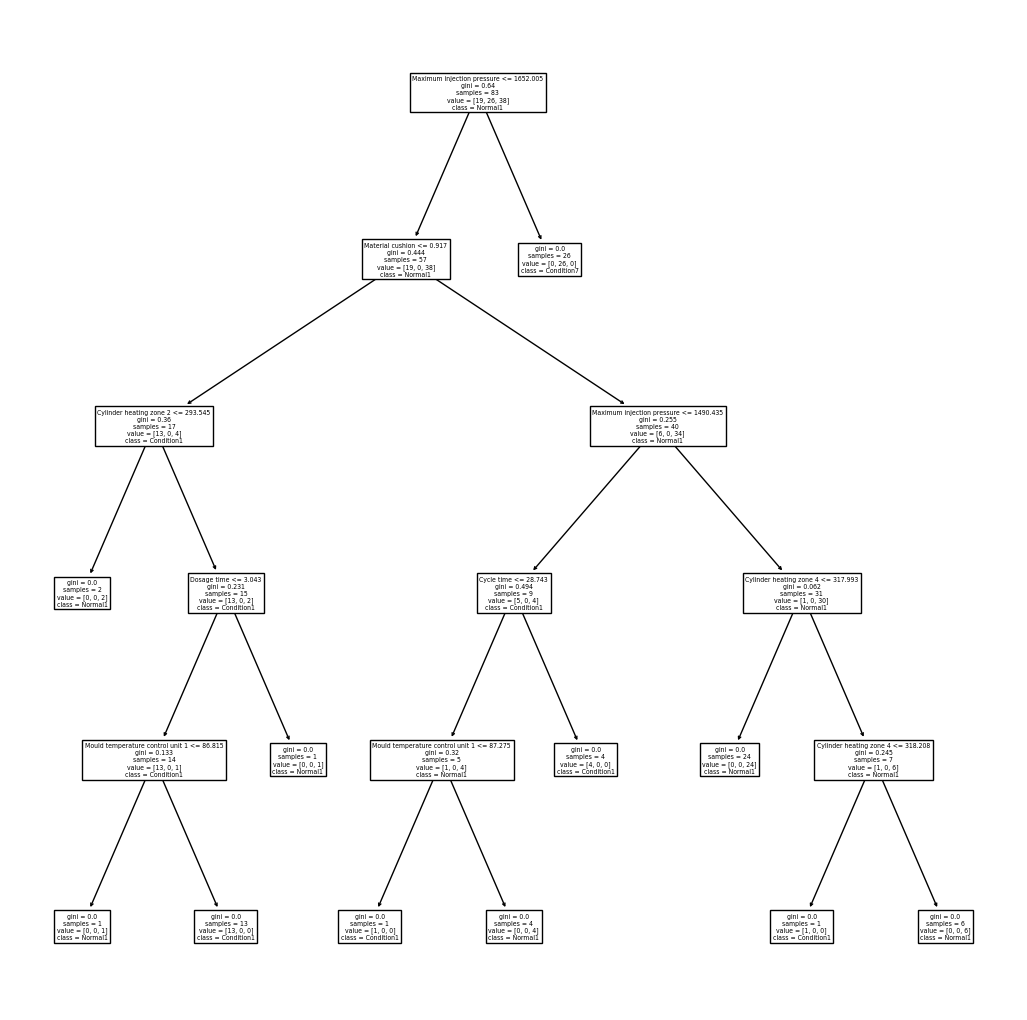

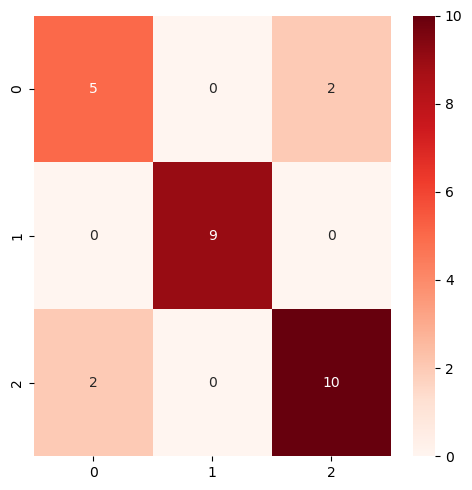

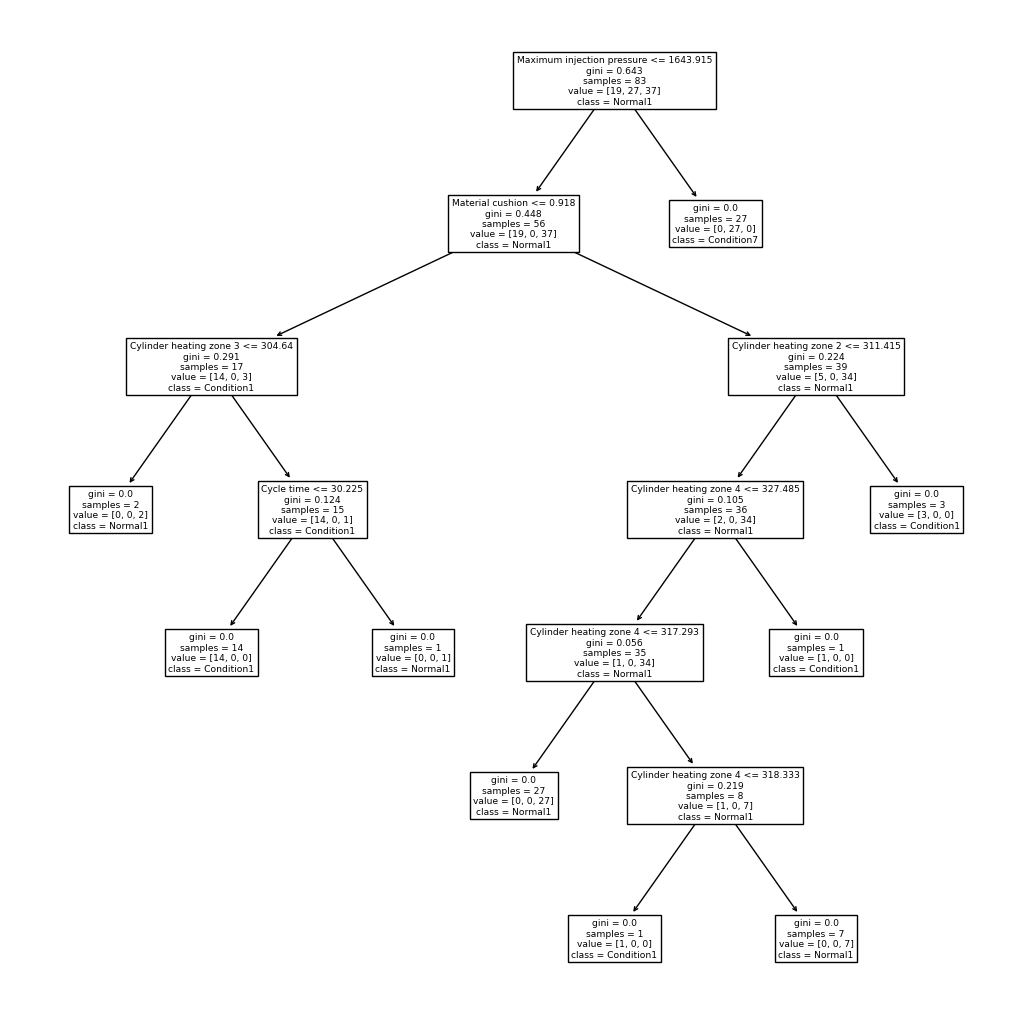

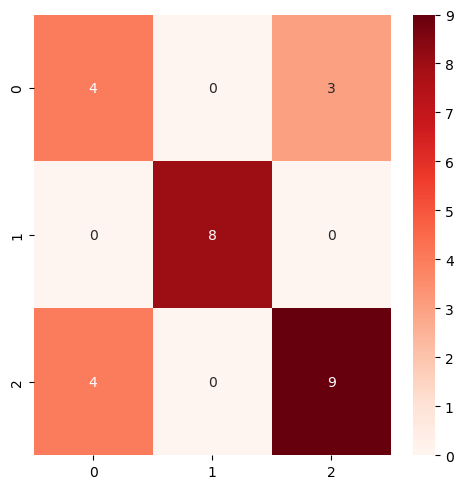

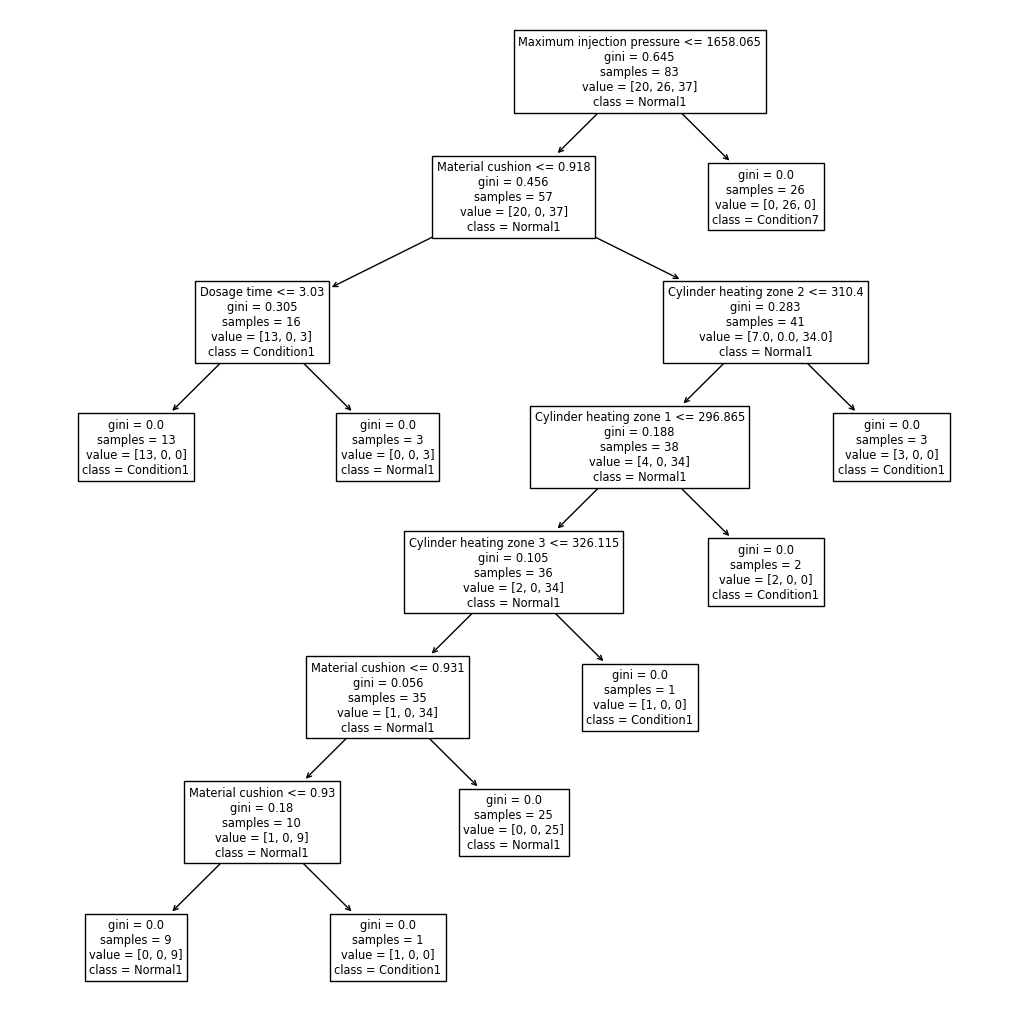

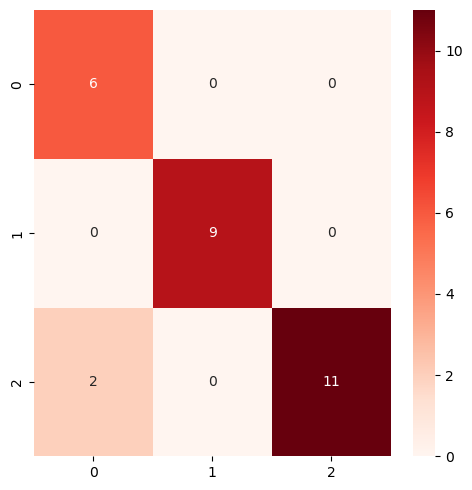

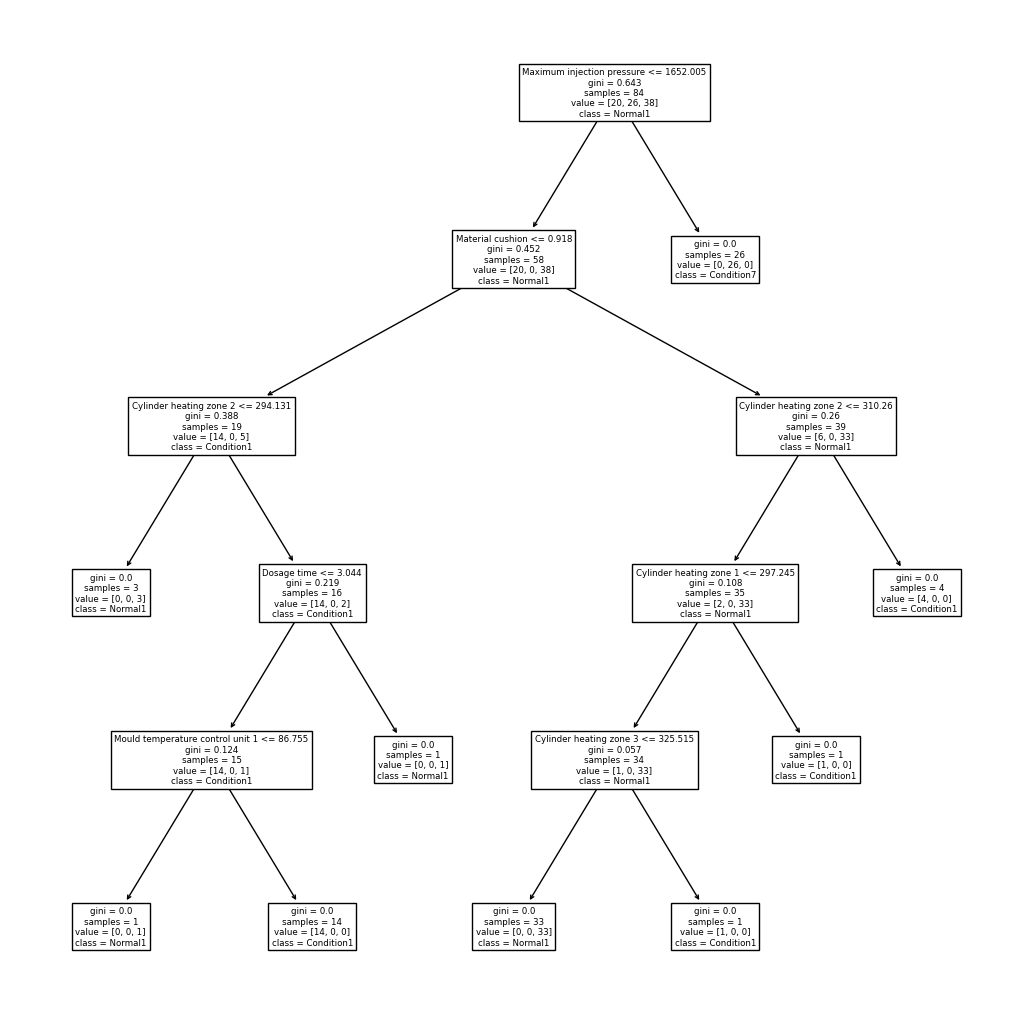

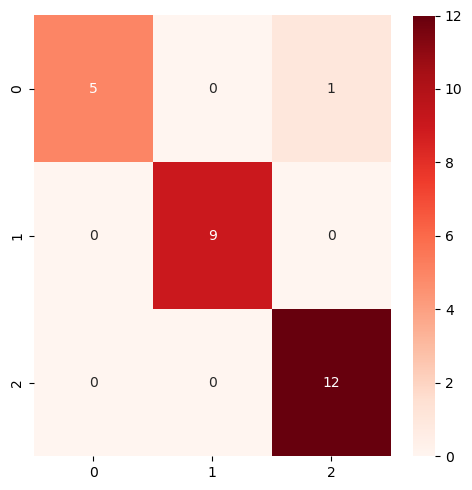

In [29]:
for train_index, test_index in cv.split(X, y):
    X_train = X.iloc[train_index]
    X_verify = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_verify = y.iloc[test_index]
    # display(X_verify)
    # display(X_train)
    print('training data length:', len(y_train))
    print('verification data length:', len(y_verify))
    
    #fit decision tree model and predict .y_predict
    default_tree.fit(X_train, y_train)
    y_predict = default_tree.predict(X_verify)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_verify, y_predict))
    print('Accuracy:', accuracy.round(2))
    accuracy_l.append(accuracy)
    
    # plot and save Decision tree 
    fig = plt.figure(figsize = (13, 13))
    # plot tree
    plot_tree(default_tree, feature_names = params,  class_names = unique_conditions, filled = False)
    # plt.savefig(savePath + '\\' + 'iris_' + str(len(accuracy_l)) + 'decision_tree.png')
    
    ### use confusion matrix to compare y_verify and y_predict, plot and save confusion matrix
    fig, ax = plt.subplots(figsize = (5,5))
    
    #use heatmap
    ax = sns.heatmap(
        confusion_matrix(y_verify, y_predict),
        annot = True,
        fmt = 'd',
        cmap = 'Reds'
    )
    plt.tight_layout()
    # plt.savefig(savePath + '\\' + 'iris_' + str(len(accuracy_l)) + 'confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_verify.reset_index(drop = True, inplace = True)
    y_verify.reset_index(drop = True,inplace = True)
    #print(X_verify)
    #print(y_verify)
    #print(y_predict)
    result_matrix = pd.concat([X_verify, y_verify], axis = 1, ignore_index = True)
    result_matrix.loc[:,5] = y_predict 
    # print('Result matrix')
    # print(result_matrix)
    # result_matrix.to_csv(savePath + '\\' + 'cv_' + str(len(accuracy_l)) + '.csv', index = False)


## GridSearch hyperparameters

In [30]:
grid_params  = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 20),  # Starting from 2 as 1 would result in no splitting
    'min_samples_leaf': range(1, 20)
}

In [31]:
start_time = time.time()

# create Decision Tree classifier model
dtree = dt()

# set up grid search
gridsearch = GridSearchCV(dtree, grid_params, cv = 5)

# train the grid search to find the best model
gridsearch_model = gridsearch.fit(X, y)

# print winning set of hyperparameters
print(gridsearch_model.best_params_)

best_model = gridsearch_model.best_estimator_

print(best_model)

end_time = time.time()
total_time = end_time - start_time
print(f'The program took {round(total_time,0)} seconds to run.')

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=3)
The program took 377.0 seconds to run.


In [32]:
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits = 4, shuffle = True, random_state = 0)

# accuracy list
accuracy_l = []

# result list
result_matrix = []

training data length: 83
verification data length: 28
Accuracy: 1.0
training data length: 83
verification data length: 28
Accuracy: 1.0
training data length: 83
verification data length: 28
Accuracy: 1.0
training data length: 84
verification data length: 27
Accuracy: 1.0


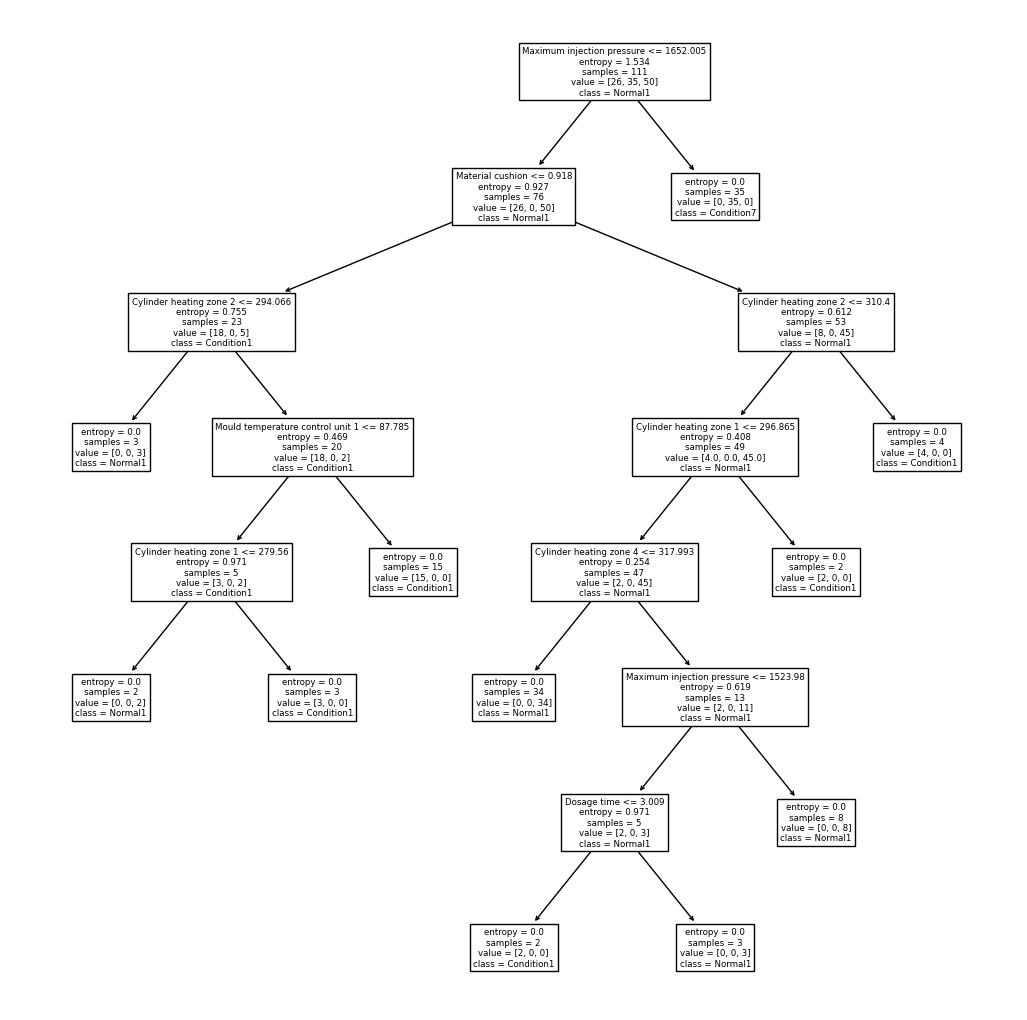

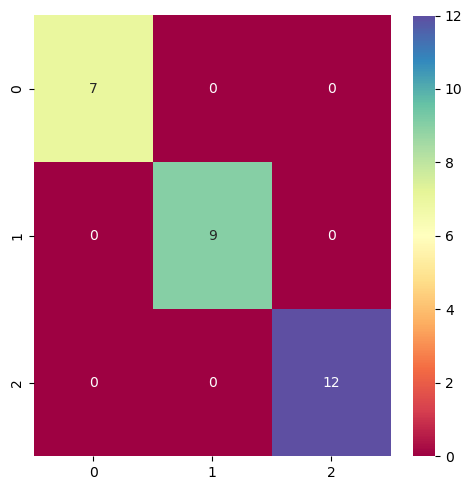

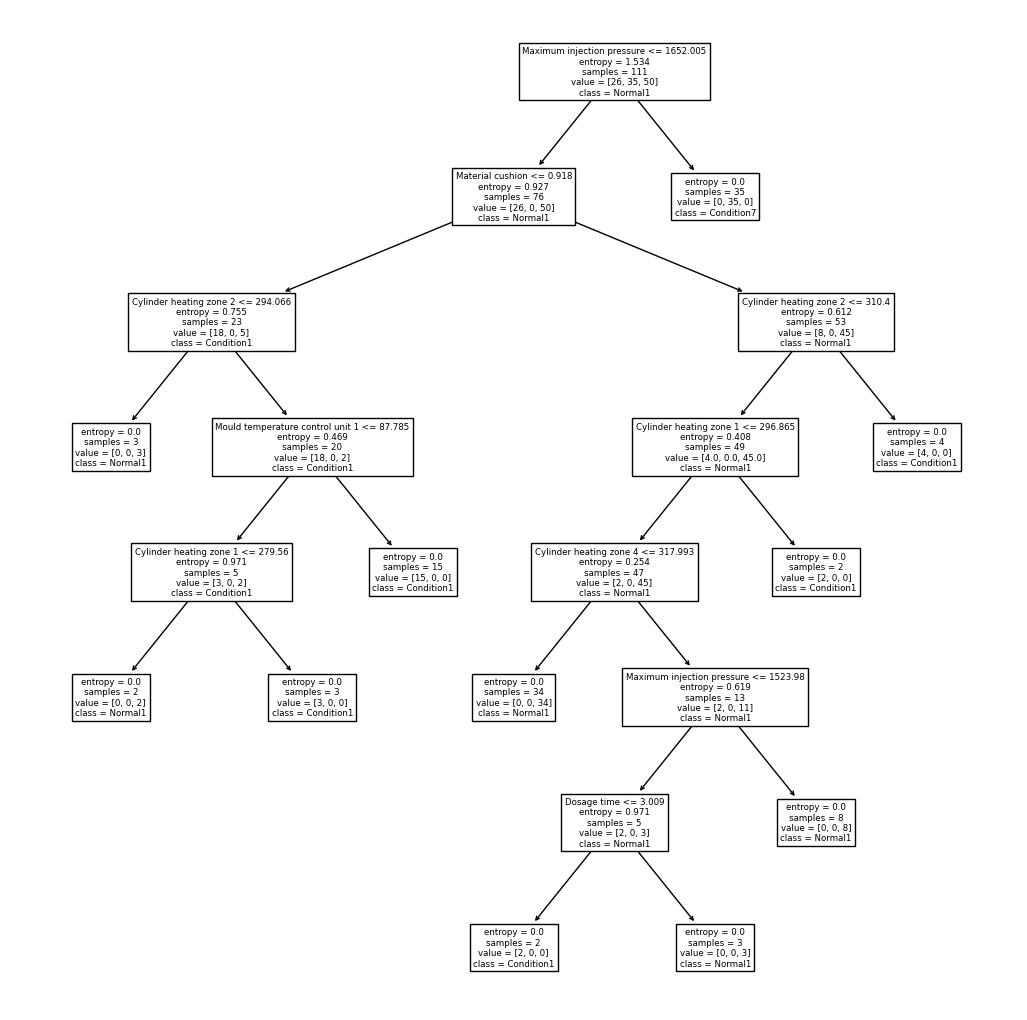

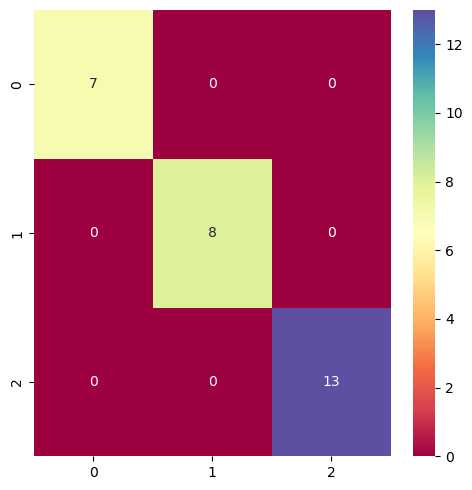

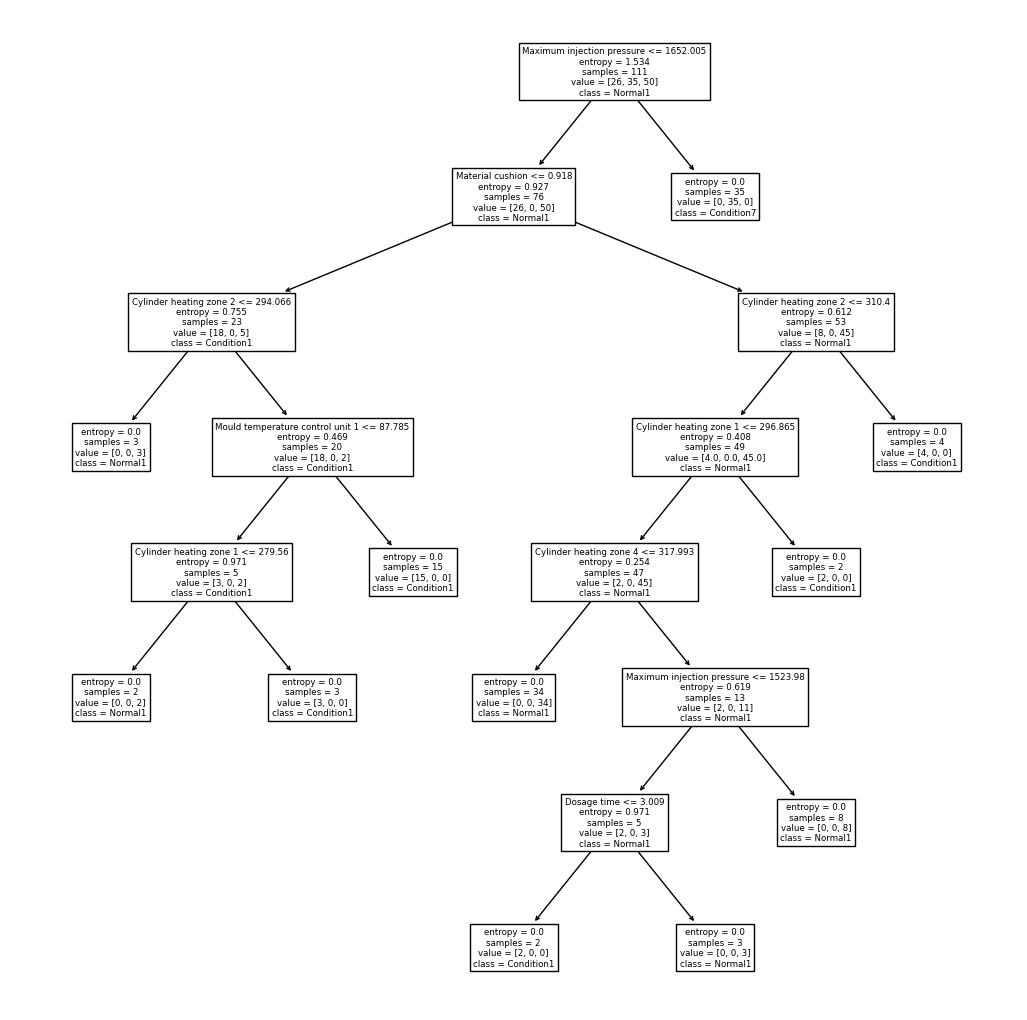

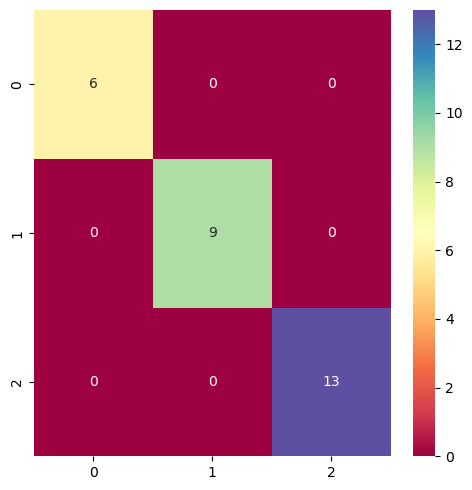

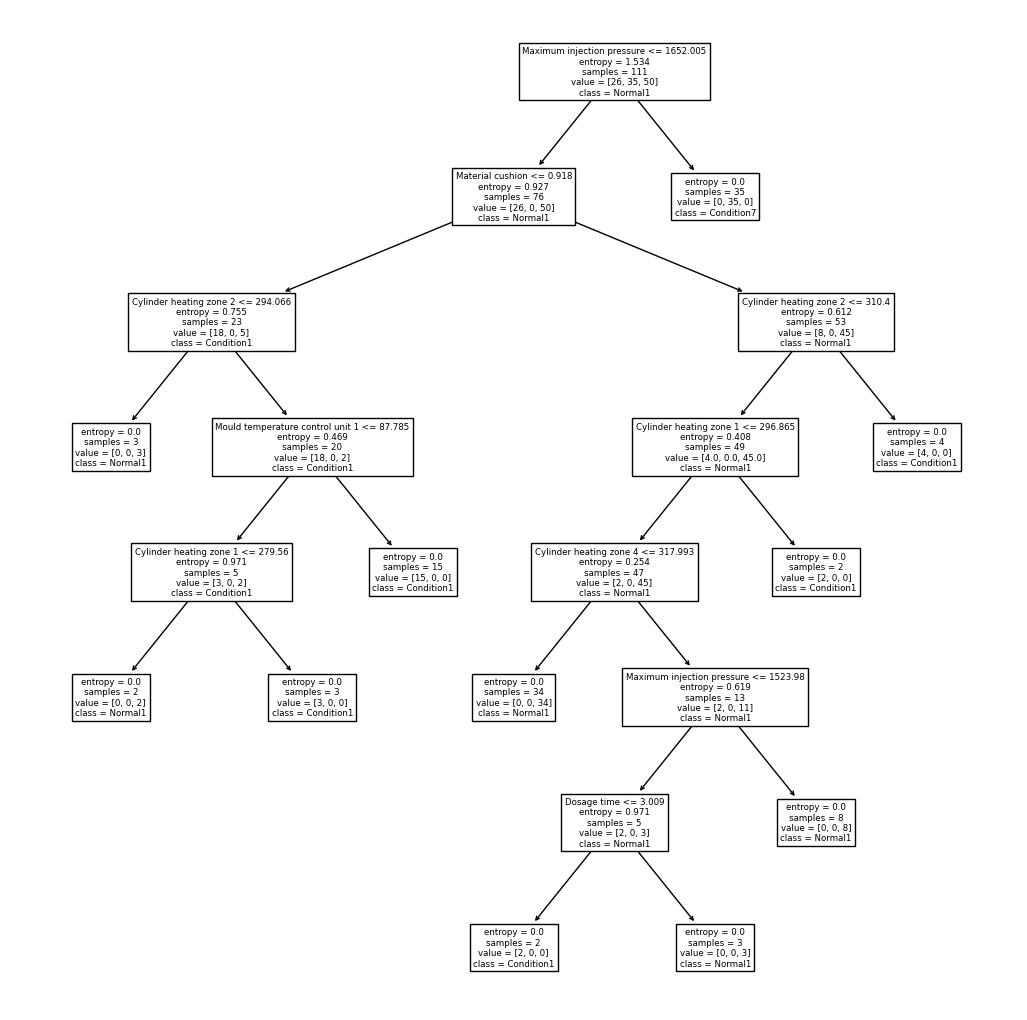

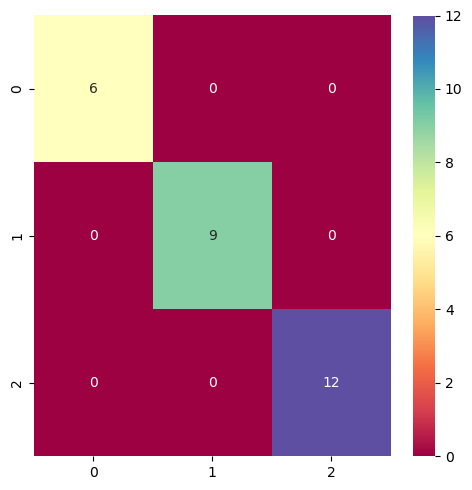

In [33]:
for train_index, test_index in cv.split(X, y):
    X_train = X.iloc[train_index]
    X_verify = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_verify = y.iloc[test_index]
    # print(X_verify)
    # print(X_train)
    print('training data length:', len(y_train))
    print('verification data length:', len(y_verify))
    
    # fit decision tree model and predict .y_predict
    y_predict = best_model.predict(X_verify)
    
    # calculate accuracy
    accuracy = np.mean(acs(y_verify, y_predict))
    print('Accuracy:', accuracy.round(2))
    accuracy_l.append(accuracy)
    
    # plot and save Decision tree 
    fig = plt.figure(figsize = (13, 13))
    # plot tree
    plot_tree(best_model, feature_names = params,  class_names = unique_conditions, filled = False)
    plt.savefig('GridSearch_' + str(len(accuracy_l)) + '_decision_tree.png')
    
    # use confusion matrix to compare y_verify and y_predict, plot and save confusion matrix
    fig, ax = plt.subplots(figsize = (5,5))
    
    #use heatmap
    ax = sns.heatmap(
        confusion_matrix(y_verify, y_predict),
        annot = True,
        fmt = 'd',
        cmap = 'Spectral'
    )
    plt.tight_layout()
    plt.savefig('GridSearch_' + str(len(accuracy_l)) + '_confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_verify.reset_index(drop = True, inplace = True)
    y_verify.reset_index(drop = True, inplace = True)
    
    # print(X_verify)
    # print(y_verify)
    # print(y_predict)
    
    result_matrix = pd.concat([X_verify, y_verify], axis = 1,ignore_index = True)
    result_matrix.loc[:,5] = y_predict 
    # print('Result matrix')
    # print(result_matrix)
    # result_matrix.to_csv(savePath + '\\' + 'cv_' + str(len(accuracy_l)) + '.csv', index = False)

## RandomSearch hyperparameters

In [51]:
rand_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

In [52]:
start_time = time.time()

# create Decision Tree classifier model
randtree = dt()

# set up grid search
randsearch = RandomizedSearchCV(randtree, rand_params, n_iter = 100, cv = 5, random_state = 1)

# train the grid search to find the best model
randsearch_model = randsearch.fit(X, y)

# print winning set of hyperparameters
print(randsearch_model.best_params_)

best_rand_model = randsearch_model.best_estimator_

print(best_rand_model)

end_time = time.time()
total_time = end_time - start_time
print(f'The program took {round(total_time,0)} seconds to run.')

{'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 6, 'min_samples_split': 13}
DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=6,
                       min_samples_split=13)
The program took 4.0 seconds to run.


In [56]:
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits = 4, shuffle = True, random_state = 0)

# accuracy list
accuracy_l = []

# result list
result_matrix = []

training data length: 83
verification data length: 28
Accuracy: 1.0
training data length: 83
verification data length: 28
Accuracy: 1.0
training data length: 83
verification data length: 28
Accuracy: 1.0
training data length: 84
verification data length: 27
Accuracy: 1.0


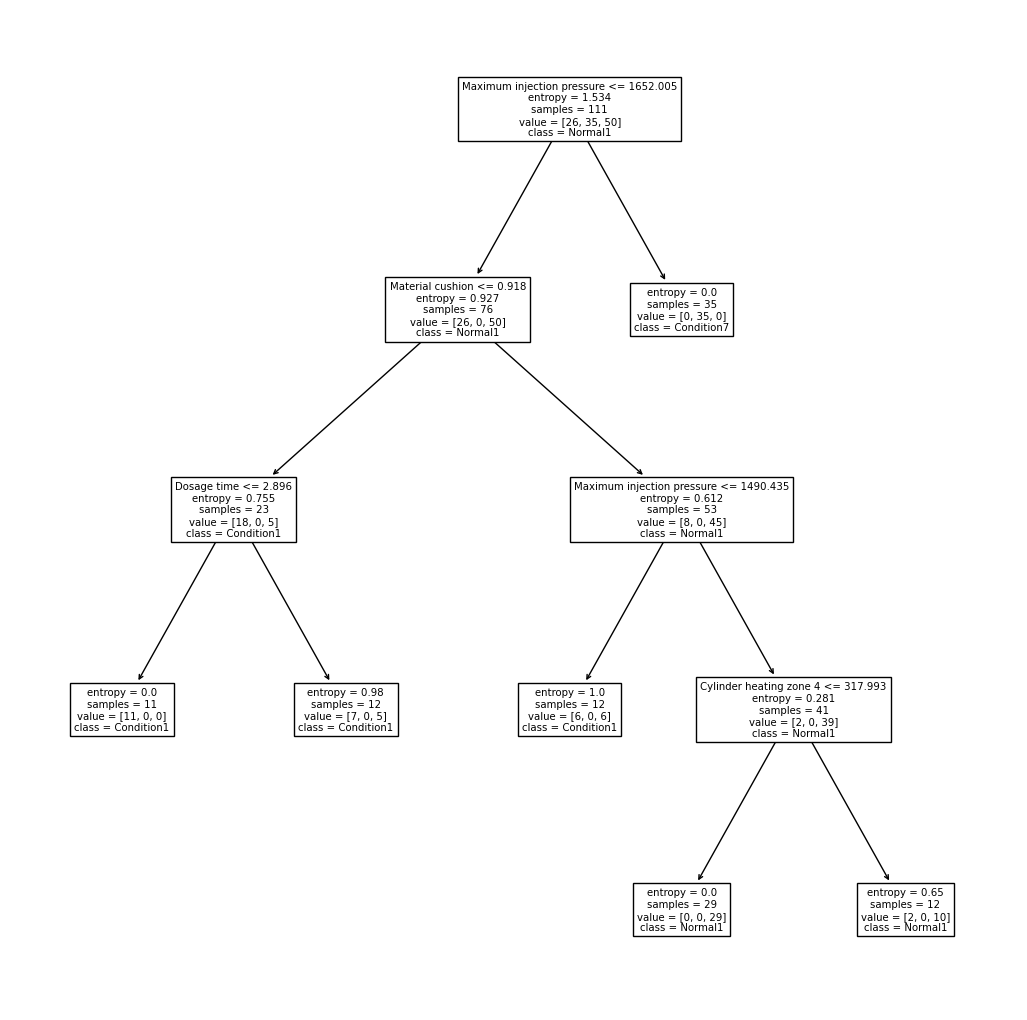

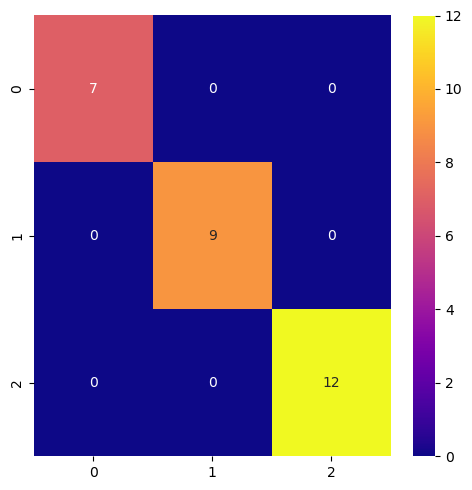

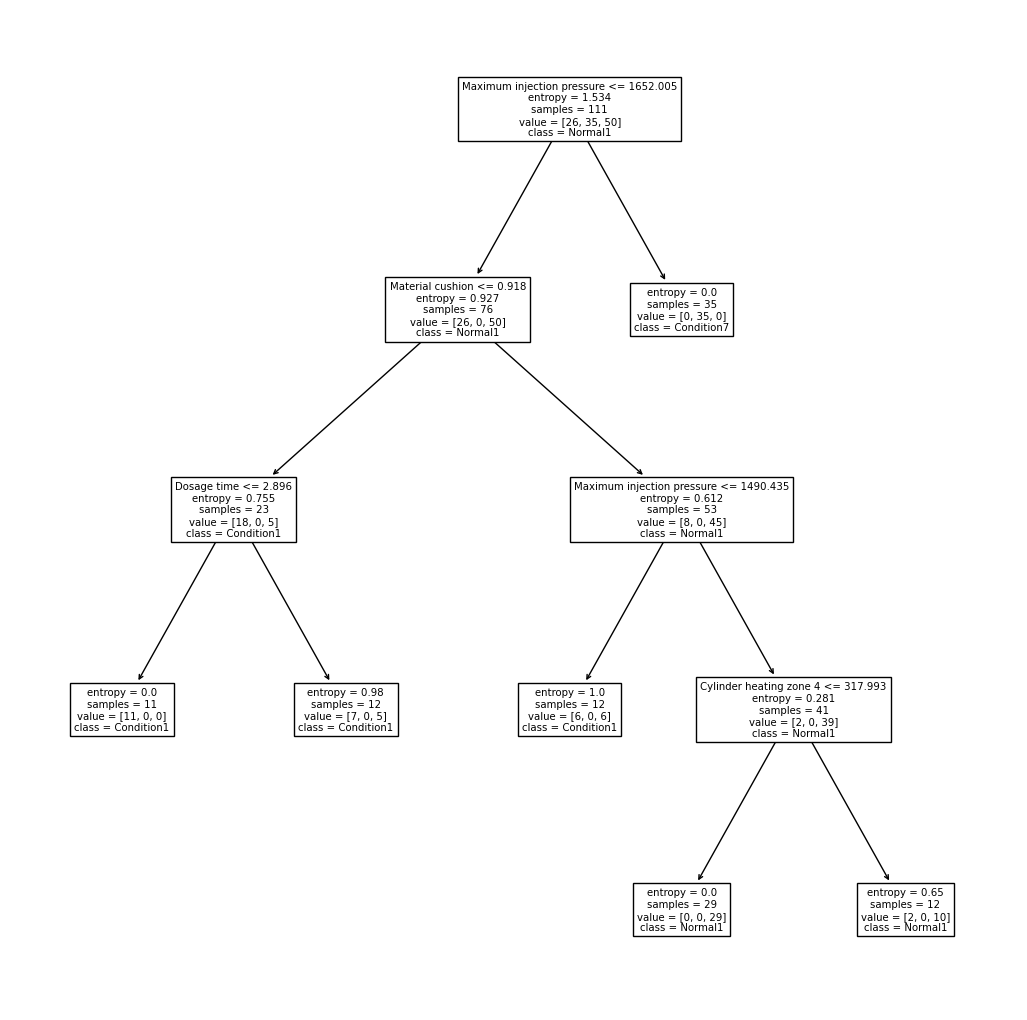

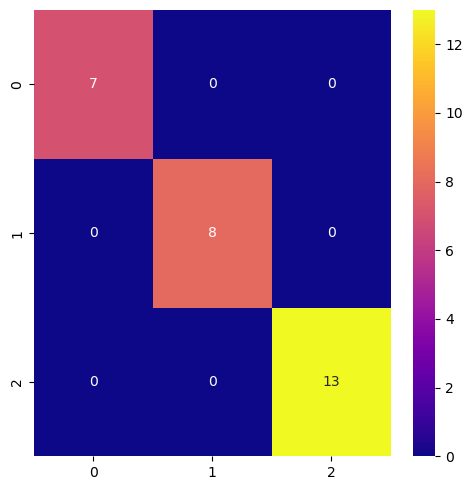

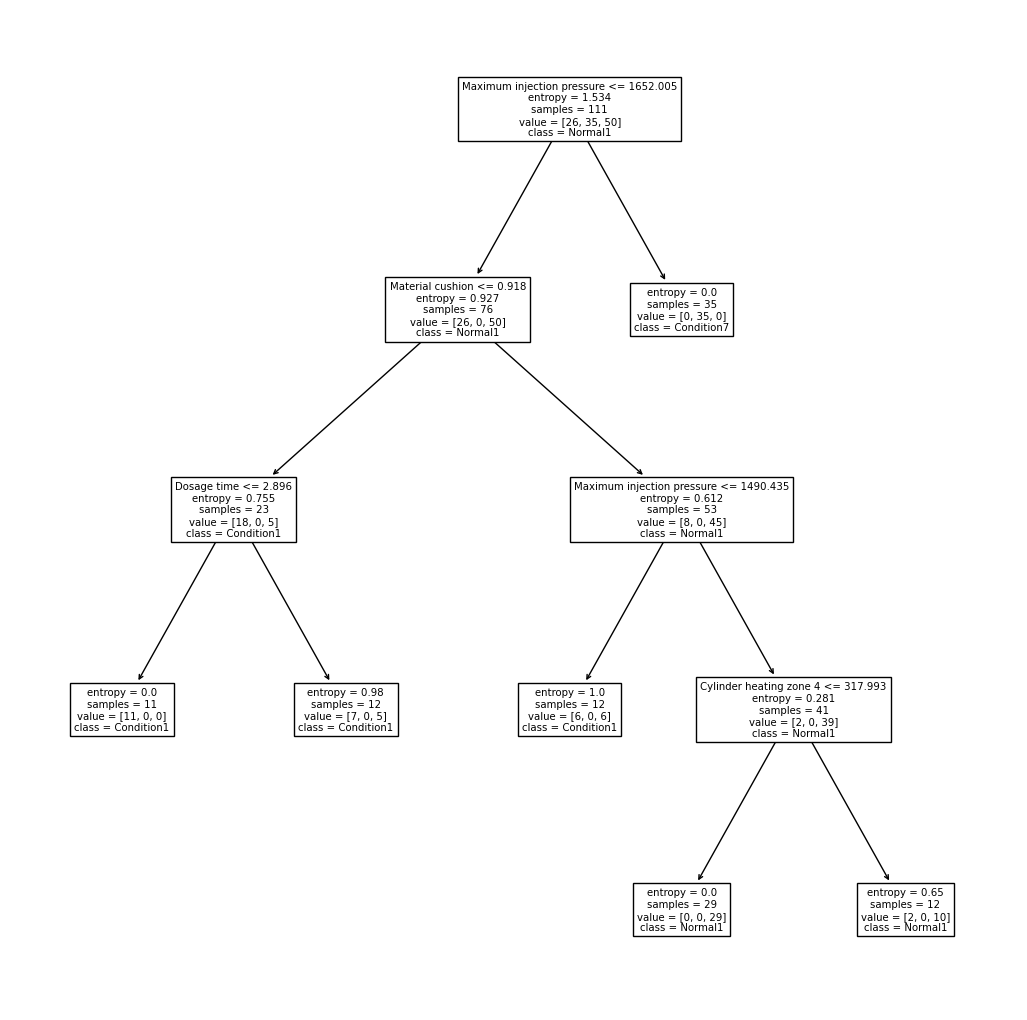

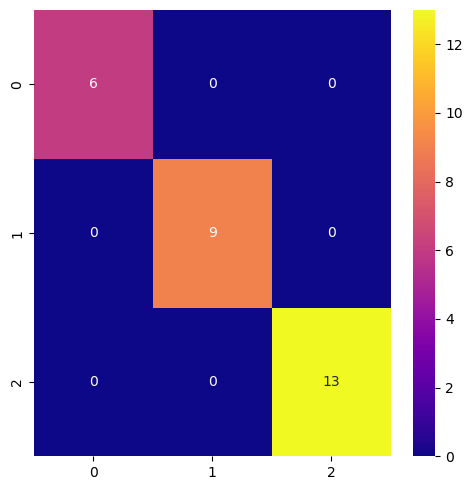

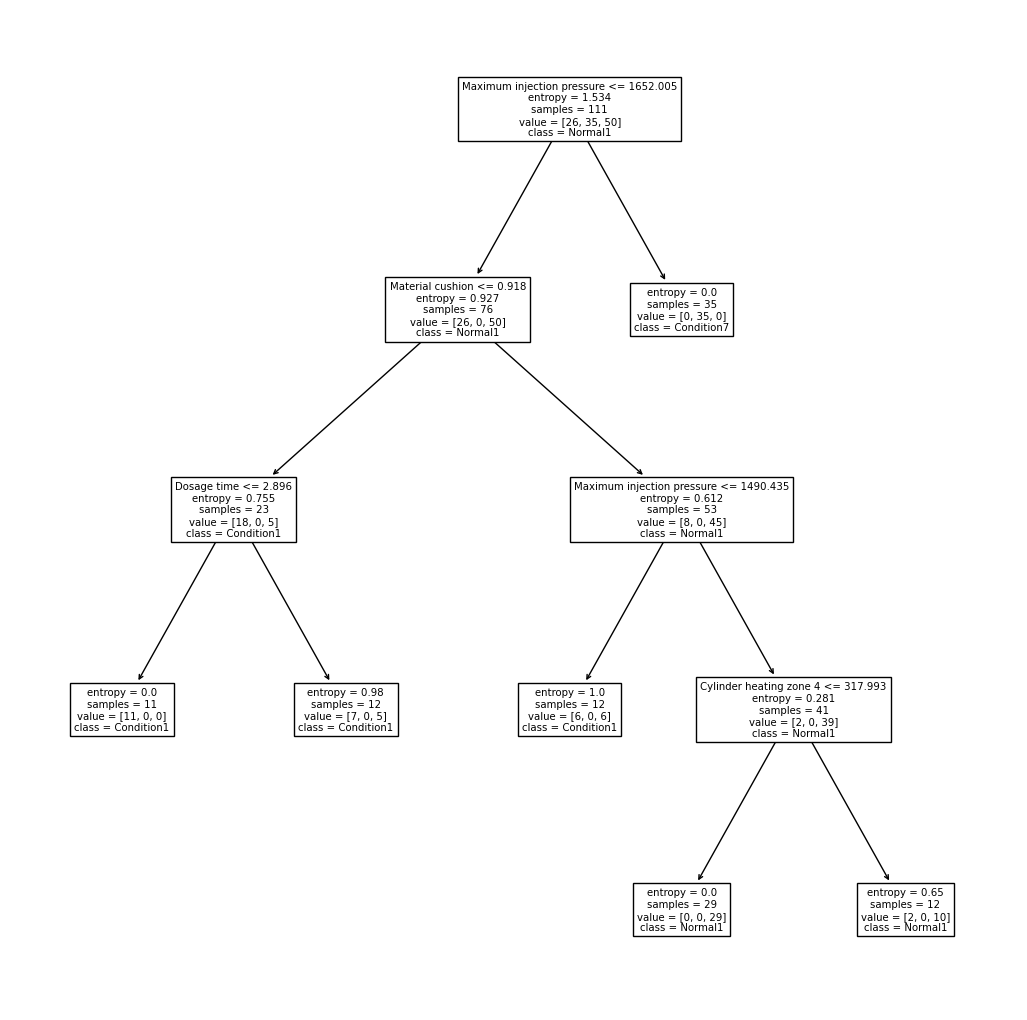

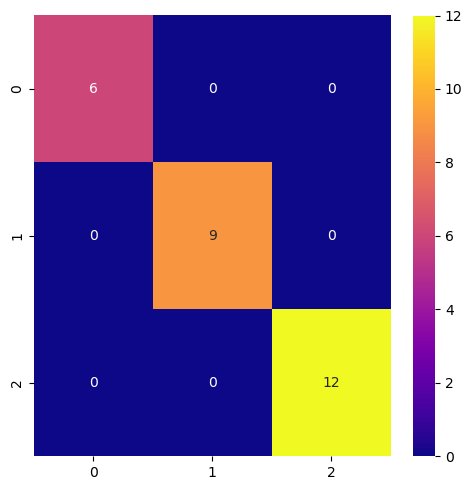

In [57]:
for train_index, test_index in cv.split(X, y):
    X_train = X.iloc[train_index]
    X_verify = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_verify = y.iloc[test_index]
    # print(X_verify)
    # print(X_train)
    print('training data length:', len(y_train))
    print('verification data length:', len(y_verify))
    
    # fit decision tree model and predict .y_predict
    y_predict = best_model.predict(X_verify)
    
    # calculate accuracy
    accuracy = np.mean(acs(y_verify, y_predict))
    print('Accuracy:', accuracy.round(2))
    accuracy_l.append(accuracy)
    
    # plot and save Decision tree 
    fig = plt.figure(figsize = (13, 13))
    # plot tree
    plot_tree(best_rand_model, feature_names = params,  class_names = unique_conditions, filled = False)
    plt.savefig('RandSearch_' + str(len(accuracy_l)) + '_decision_tree.png')
    
    # use confusion matrix to compare y_verify and y_predict, plot and save confusion matrix
    fig, ax = plt.subplots(figsize = (5,5))
    
    #use heatmap
    ax = sns.heatmap(
        confusion_matrix(y_verify, y_predict),
        annot = True,
        fmt = 'd',
        cmap = 'plasma'
    )
    plt.tight_layout()
    plt.savefig('RandSearch_' + str(len(accuracy_l)) + '_confusion matrix.png')
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_verify.reset_index(drop = True, inplace = True)
    y_verify.reset_index(drop = True, inplace = True)
    
    # print(X_verify)
    # print(y_verify)
    # print(y_predict)
    
    result_matrix = pd.concat([X_verify, y_verify], axis = 1,ignore_index = True)
    result_matrix.loc[:,5] = y_predict 
    # print('Result matrix')
    # print(result_matrix)
    # result_matrix.to_csv(savePath + '\\' + 'cv_' + str(len(accuracy_l)) + '.csv', index = False)

# <span style='color:Yellow'>Plot data</span>

In [35]:
svplt = True

## Quality Indicators

In [36]:
Q = ['Material cushion']

## Color palette

https://matplotlib.org/stable/gallery/color/colormap_reference.html

https://seaborn.pydata.org/tutorial/color_palettes.html

In [37]:
# An array of workable colours for our dear Mechanic.
colourScheme = 'blend:Yellow,#FF69B4,Blue' # '#FF69b4_r'
colours = sns.color_palette(colourScheme, as_cmap = False, n_colors = 3)
display(colours)
g = sns.FacetGrid(
    data = g9_df,
    height = 5
)

sns.set_theme(style = 'darkgrid')

test_df = pd.

ax = sns.scatterplot(
    data = g9_df,
    x = 'Cycle time',
    y = 'Dosage time',
    size = 'Material cushion',
    hue = 'Condition',
    palette = colours,
    legend = False
)

g.savefig('Test.png')

SyntaxError: invalid syntax (1042227973.py, line 12)

## Seaborn Pairplots

In [ ]:
g = sns.pairplot(
    data = g9_df,
    kind = 'reg',
    diag_kind = 'kde',
    hue = 'Condition',
    palette = colours,
    height = 3
)

# g.map_diag(sns.kdeplot)
g.add_legend()
# g.savefig('G9_pairplots.png')

plt.show()

## Seaborn PairGrids KDE & Scatter

In [ ]:
g = sns.PairGrid(
    data = g9_df,
    hue = 'Condition',
    palette = colourScheme,
    height = 3,
    diag_sharey = False
)

g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
g.add_legend()

if svplt:
    g.savefig('G9_PairGrid_scatter_kde.png')

plt.show()

## Seaborn PairGrids Hist & Reg

In [ ]:
g = sns.PairGrid(
    data = g9_df,
    hue = 'Condition',
    palette = colours,
    height = 3,
    diag_sharey = False
)

g.map_upper(sns.histplot, bins = 15, stat = 'density')
g.map_lower(sns.regplot)
g.map_diag(sns.kdeplot)
g.add_legend()

if svplt:
    g.savefig('G9_PairGrid_hist_reg.png')

plt.show()

## Seaborn Violinplots (<span style='color:Red'>Work in Progress</span>)

In [ ]:
# sns.catplot(data = g9_df['Material cushion'], kind = 'violin', palette = colourScheme)
# plt.xticks(rotation = 90)

## Seaborn Histogram (<span style='color:Red'>Work in Progress</span>)

In [ ]:
# g = sns.histplot(data = g9_df, palette = colourScheme)
# sns.move_legend(g, 'center left', bbox_to_anchor=(1, 0.5))
# plt.show()

for param in params:
    g = sns.histplot(
        data = g9_df,
        x = param,
        
        # kind = 'hist',
        bins = 15,
        stat = 'density',
        
        hue = 'Condition',
        palette = colourScheme
    )
    
    sns.kdeplot(
        data = g9_df,
        x = param,
        
        # kind = 'kde',  # Plot the KDE plot first
        fill = True,  # Fill the KDE area for better visualization

        hue = 'Condition',
        palette = colourScheme,
        
        legend = False  # Disable legend for KDE (optional, reused later)
    )

    sns.move_legend(g, 'center right', bbox_to_anchor = (1, 0.5))

    if svplt:
        g.savefig(f'G9_single_hist_{param}.png')
    
    plt.show()

## Seaborn KDE

In [ ]:
for param in params:
    g = sns.displot(kind = 'kde',
                    data = g9_df,
                    hue = 'Condition',
                    x = param,
                    palette = colourScheme)
    sns.move_legend(g, 'center right', bbox_to_anchor = (1, 0.5))
    plt.show()

## Seaborn ??plot

## Seaborn ??plot

## Communism

<img src = 'https://cdn.catholic.com/wp-content/uploads/AdobeStock_211810650-1200x400.jpeg' alt = 'Quirky Image' width = '1200' height = '400'>

# <span style='color:Red'>Manually plotted charts. Deprecated plots.</span>

## Cylinder heating zone

In [ ]:
chz = params[np.array([param.startswith('Cylinder heating zone ') for param in params])]

display(chz)

In [ ]:
# colours = get_colour_set(len(chz))

In [ ]:
for condition in conditions:
    plt.figure(figsize = (12, 9))
    for zone, colour in zip(chz, colours):
        plt.scatter(np.arange(g9_des[condition]['Condition']['count']),
                    g9_df[g9_df['Condition'] == condition][zone],
                    label = zone,
                    color = colour)
        plt.axhline(y = g9_des[condition][zone]['mean'],
                    linestyle = '--',
                    label = zone + 'Mean',
                    color = colour)
    
    plt.title(condition)
    plt.legend(bbox_to_anchor = (1.04, 0.5), loc = 'center left')
    plt.grid(True)
    plt.show()


In [ ]:
plt.figure(figsize = (12, 9))

for condition in conditions:
    for zone, colour in zip(chz, colours):
        g9_mean = g9_des[condition][zone]['mean']
        plt.bar(condition + ' - ' + zone, g9_mean, label = condition + ' - ' + zone, color = colour)

plt.xticks(rotation = 90)
plt.title('Mean Temps')
plt.legend(bbox_to_anchor = (1.04, 0.5), loc = 'center left')
plt.grid(True)
plt.show()

## Pair Plots (Manual)

In [ ]:
Q = ['Material cushion', 'Switch-over volume']
H = [param for param in params if param not in ['Condition', *Q]]

In [ ]:
display(Q)
display(H)

In [ ]:
#Randomize colours
# colours = get_colour_set(len(H))

#Hijack colours with RGB
# colours = ['r', 'g', 'b']

In [ ]:
for condition in conditions:
    for col in Q:
        plt.figure(figsize = (5, 5))
        for col2, colour in zip(H, colours):
            plt.scatter(g9_df[g9_df['Condition'] == condition][col2], g9_df[g9_df['Condition'] == condition][col], label = col2, color = colour)
        plt.ylabel(col)
        plt.title(condition + ' against ' + col)
        plt.legend(bbox_to_anchor = (1.04, 0.5), loc = 'center left')
        plt.grid(True)
        plt.show()
    


## Comparing Values by Condition

In [ ]:
H = params

In [ ]:
display(H)

In [ ]:
# colours = ['r', 'g', 'b']

In [ ]:
for param in params:
    fig, ax = plt.subplots(figsize = (1, 1))
    for i, condition, colour in zip(np.arange(len(conditions)), conditions, colours):
        cou = g9_des[condition]['Condition']['count']
        ax.scatter(np.ones(cou) * i,
                    g9_df[g9_df['Condition'] == condition][param],
                    label = condition,
                    color = colour)
        # ax.axhline(y = g9_des[condition][col]['max'],
        #     linestyle = '--',
        #     color = colour)
        # ax.axhline(y = g9_des[condition][col]['min'],
        #     linestyle = '--',
        #     color = colour)
        ax.axhline(y = g9_des[condition][col]['mean'],
                    linestyle = '-',
                    label = condition + ' Mean',
                    color = colour,
                    linewidth = 5 - (i + 1))
    # ax.set_ylim(0, g9_des[condition][col]['max'])
    plt.title(col)
    plt.legend(bbox_to_anchor = (1.04, 0.5), loc = 'center left')
    plt.grid(True)
    plt.show()

# EOF

In [ ]:
print('This program exited successfully.')